In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
#pd.__version__
%matplotlib inline

In [3]:
df = pd.read_csv('ppd_data.csv',parse_dates=[2],index_col=2)
cropDf = df.dropna(subset=['postcode'])
cropDf.head()

,unique_id,price_paid,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data_uri
deed_date,,,,,,,,,,,,,,,
2009-08-17,F3AACEA2-544E-44C2-9267-A12F779CB09A,240000,CB1 1AJ,F,Y,L,1,GUTHRIE COURT,PARADISE STREET,NaN,CAMBRIDGE,CAMBRIDGE,CAMBRIDGESHIRE,A,http://landregistry.data.gov.uk/data/ppi/trans...
2016-07-08,404A5AF3-2979-CD2B-E050-A8C063055C7B,350000,CB1 1AJ,F,Y,L,13,GUTHRIE COURT,PARADISE STREET,NaN,CAMBRIDGE,CAMBRIDGE,CAMBRIDGESHIRE,A,http://landregistry.data.gov.uk/data/ppi/trans...
2016-09-16,404A5AF3-29C7-CD2B-E050-A8C063055C7B,500000,CB1 1AJ,F,Y,L,15,GUTHRIE COURT,PARADISE STREET,NaN,CAMBRIDGE,CAMBRIDGE,CAMBRIDGESHIRE,A,http://landregistry.data.gov.uk/data/ppi/trans...
2009-05-14,DDBCCBFE-BEB7-41DB-8CD1-41D4D771B7B9,290000,CB1 1AJ,F,Y,L,5,GUTHRIE COURT,PARADISE STREET,NaN,CAMBRIDGE,CAMBRIDGE,CAMBRIDGESHIRE,A,http://landregistry.data.gov.uk/data/ppi/trans...
2009-09-07,DF758951-B876-4848-ADBA-730FB1DCD92F,272500,CB1 1AJ,F,Y,L,6,GUTHRIE COURT,PARADISE STREET,NaN,CAMBRIDGE,CAMBRIDGE,CAMBRIDGESHIRE,A,http://landregistry.data.gov.uk/data/ppi/trans...


In [4]:
print(df.shape)
print(cropDf.shape)

(20061, 15)
(20061, 15)


In [5]:
df['price_paid'].describe()

count    2.006100e+04
mean     2.349394e+05
std      2.836125e+05
min      5.500000e+03
25%      1.150000e+05
50%      1.909500e+05
75%      2.900000e+05
max      2.034900e+07
Name: price_paid, dtype: float64

In [6]:
# What is the most expensive house sale?
df.loc[df['price_paid'].idxmax()]

unique_id                            288DCE2A-08D8-E510-E050-A8C06205480E
price_paid                                                       20349000
postcode                                                          CB1 2JY
property_type                                                           O
new_build                                                               N
estate_type                                                             L
saon                                                                  NaN
paon                                                           KETT HOUSE
street                                                       STATION ROAD
locality                                                              NaN
town                                                            CAMBRIDGE
district                                                        CAMBRIDGE
county                                                     CAMBRIDGESHIRE
transaction_category                  

Average price paid = £ 458235
Average price paid = £ 77665


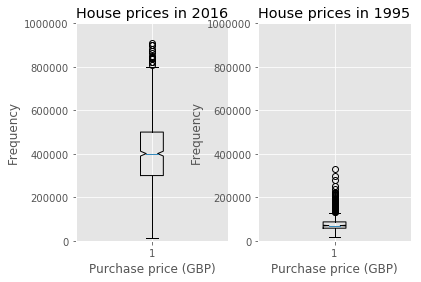

In [7]:
print('Average price paid = £ %d' % np.mean(df['2016']['price_paid']))
print('Average price paid = £ %d' % np.mean(df['1995']['price_paid']))

plt.subplot(1, 2, 1)
plt.boxplot(df['2016']['price_paid'],70)
plt.ylim([0, 1e6])
plt.xlabel('Purchase price (GBP)')
plt.ylabel('Frequency')
plt.title("House prices in 2016")

plt.subplot(1, 2, 2)
plt.boxplot(df['1995']['price_paid'],70)
plt.ylim([0, 1e6])
plt.xlabel('Purchase price (GBP)')
plt.ylabel('Frequency')
plt.title("House prices in 1995")
plt.show()

DatetimeIndex(['2009-08-17', '2016-07-08', '2016-09-16', '2009-05-14',
               '2009-09-07', '2011-07-29', '2008-09-30', '2012-03-02',
               '2012-05-04', '2012-06-12',
               ...
               '1997-04-11', '2009-02-17', '2005-03-18', '1995-01-27',
               '2002-12-12', '1995-03-01', '2002-12-19', '1998-06-29',
               '1996-10-18', '1998-05-29'],
              dtype='datetime64[ns]', name='deed_date', length=20061, freq=None)


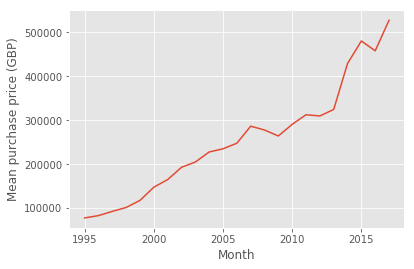

In [8]:
print(df.index)
monthMeans = df['price_paid'].groupby(df.index.year).aggregate(np.mean)
plt.plot(monthMeans)
plt.xlabel('Month')
plt.ylabel('Mean purchase price (GBP)')
plt.show()

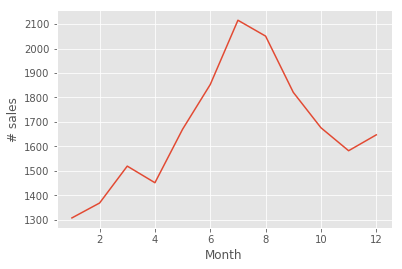

In [9]:
# as expected, the summer months are the busiest ones and the market is dead in January
numSalesByMonth = df['price_paid'].groupby(df.index.month).aggregate(len)
plt.plot(numSalesByMonth)
#plt.ylim([0, 500])
plt.xlabel('Month')
plt.ylabel('# sales')
plt.show()

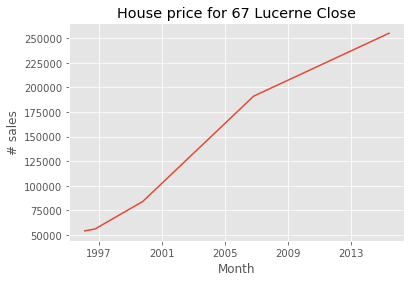

In [11]:
# zooming into a single house (only picking this one because it had several transactions over the years)
lucerne_close = df.loc[(df['street'] == 'LUCERNE CLOSE') & (df['paon']=='67')]['price_paid']
plt.plot(lucerne_close)
plt.title("House price for 67 Lucerne Close")
plt.xlabel('Month')
plt.ylabel('# sales')
plt.show()

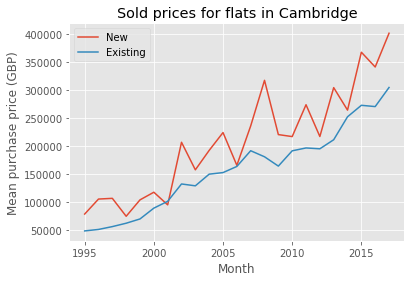

In [22]:
pricesFlatNew = df.loc[(df['property_type']=='F') & (df['new_build']=='Y')]['price_paid']
monthlyMeanFlatNew = pricesFlatNew.groupby(pricesFlatNew.index.year).aggregate(np.mean)

pricesFlatOld = df.loc[(df['property_type']=='F') & (df['new_build']=='N')]['price_paid']
monthlyMeanFlatOld = pricesFlatOld.groupby(pricesFlatOld.index.year).aggregate(np.mean)

plt.plot(monthlyMeanFlatNew)
plt.plot(monthlyMeanFlatOld)
plt.legend(['New','Existing'],loc='upper left')
plt.xlabel('Month')
plt.ylabel('Mean purchase price (GBP)')
plt.title('Sold prices for flats in Cambridge')
plt.show()